# ✈ **Airline Passenger Satisaction** ✈

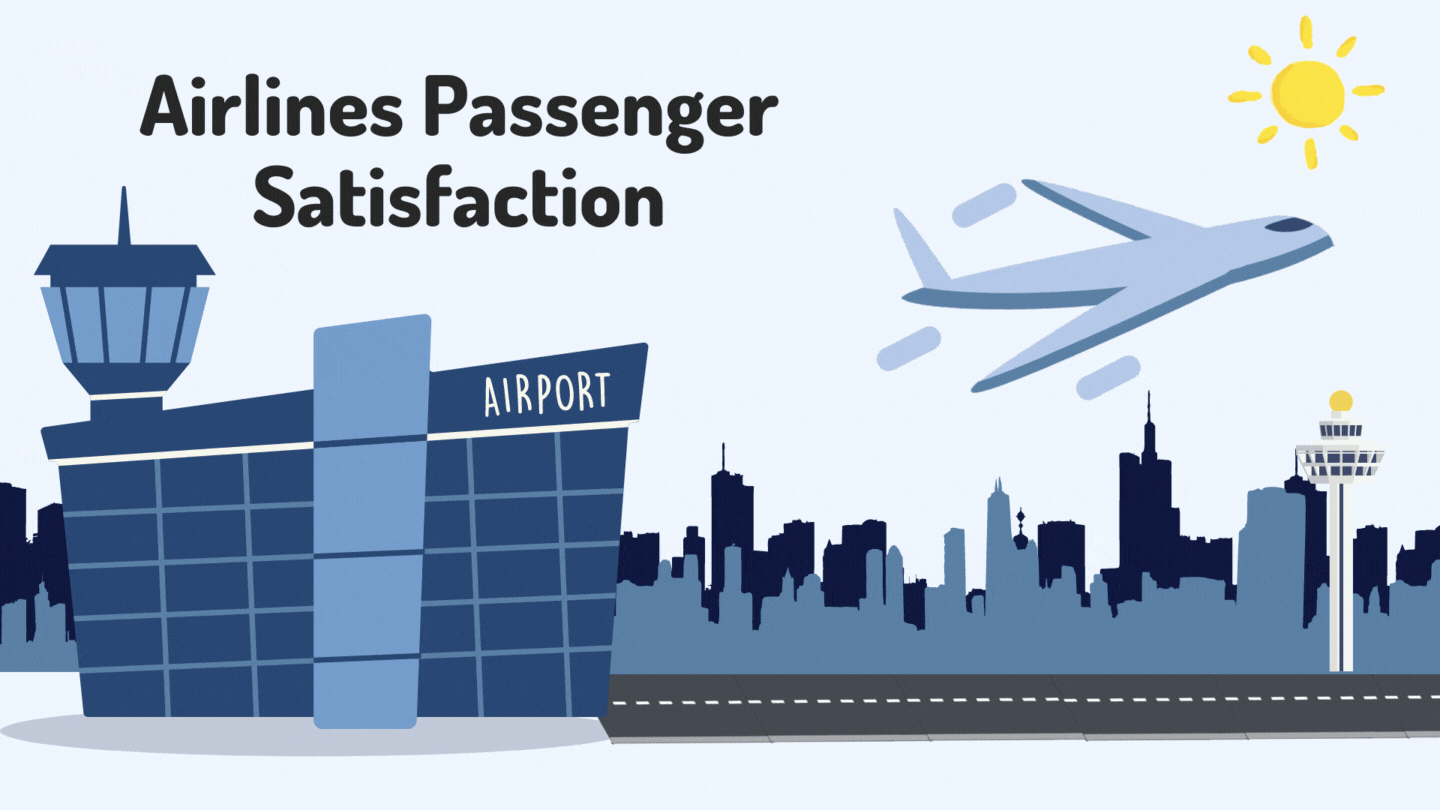

## KÜTÜPHANELER ve VERİ YÜKLEME

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML Kütüphaneleri
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay
)

%matplotlib inline

In [32]:
# Veri yükleme
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (103904, 25)
Test shape: (25976, 25)


In [33]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [35]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


## GEREKSİZ SÜTUN ve EKSİK DEĞER

In [36]:
# TRAIN seti temizliği
drop_cols = ["Unnamed: 0", "id"]
for col in drop_cols:
    if col in train.columns:
        train.drop(columns=col, inplace=True)

# Eksik değer doldurma (Önerilen yöntem)
if "Arrival Delay in Minutes" in train.columns:
    median_value = train["Arrival Delay in Minutes"].median()
    train["Arrival Delay in Minutes"] = train["Arrival Delay in Minutes"].fillna(median_value)

In [37]:
print("\nEksik değerler (train):")
train.isnull().sum()


Eksik değerler (train):


,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


In [38]:
# TEST seti temizliği
for col in drop_cols:
    if col in test.columns:
        test.drop(columns=col, inplace=True, errors='ignore')

if "Arrival Delay in Minutes" in test.columns:
    median_value = test["Arrival Delay in Minutes"].median()
    test["Arrival Delay in Minutes"] = test["Arrival Delay in Minutes"].fillna(median_value)

In [39]:
print("\nEksik değerler (test):")
test.isnull().sum()


Eksik değerler (test):


,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


## HEDEF DEĞİŞKEN KODLANMASI (TRAIN)

In [40]:
# 'satisfaction' sütununa Label Encoding uyguluyoruz
le = LabelEncoder()
train["satisfaction"] = le.fit_transform(train["satisfaction"])
print("Hedef değişkenin sınıf değerleri:", train["satisfaction"].unique())

Hedef değişkenin sınıf değerleri: [0 1]


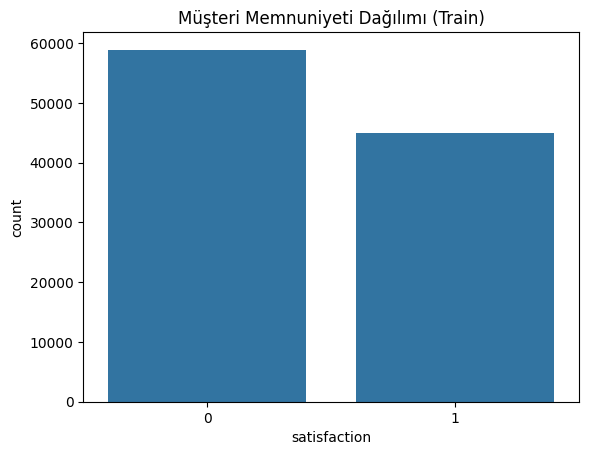

In [41]:
# Hedef değişkenin dağılımı:
sns.countplot(x='satisfaction', data=train)
plt.title("Müşteri Memnuniyeti Dağılımı (Train)")
plt.show()

## ONE-HOT ENCODING (TRAIN)

In [42]:
# Hedef değişken artık int tipinde. Geri kalan kategorik sütunları bulalım.
cat_cols = train.select_dtypes(include=['object']).columns
print("Kodlanacak kategorik sütunlar (train):", list(cat_cols))

Kodlanacak kategorik sütunlar (train): ['Gender', 'Customer Type', 'Type of Travel', 'Class']


In [43]:
# One-Hot Encoding
train_encoded = pd.get_dummies(train, columns=cat_cols, drop_first=True)
print("Kodlama sonrası eğitim veri setinin şekli:", train_encoded.shape)

Kodlama sonrası eğitim veri setinin şekli: (103904, 24)


## EĞİTİM - DOĞRULAMA BÖLÜNMESİ

In [44]:
X = train_encoded.drop("satisfaction", axis=1)
y = train_encoded["satisfaction"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Eğitim verisi boyutu:", X_train.shape)
print("Doğrulama verisi boyutu:", X_val.shape)

Eğitim verisi boyutu: (83123, 23)
Doğrulama verisi boyutu: (20781, 23)


## RANDOM FOREST MODELİ (TEMEL) ve DOĞRULAMA DEĞERLENDİRME

In [45]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Doğrulama seti üzerinde tahmin
y_pred = rf_model.predict(X_val)

In [28]:
# Performans
acc_rf = accuracy_score(y_val, y_pred)
print("Temel Random Forest - Doğruluk (Accuracy):", acc_rf)
print("Sınıflandırma Raporu:")
print(classification_report(y_val, y_pred))

Temel Random Forest - Doğruluk (Accuracy): 0.9618401424378038
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11713
           1       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



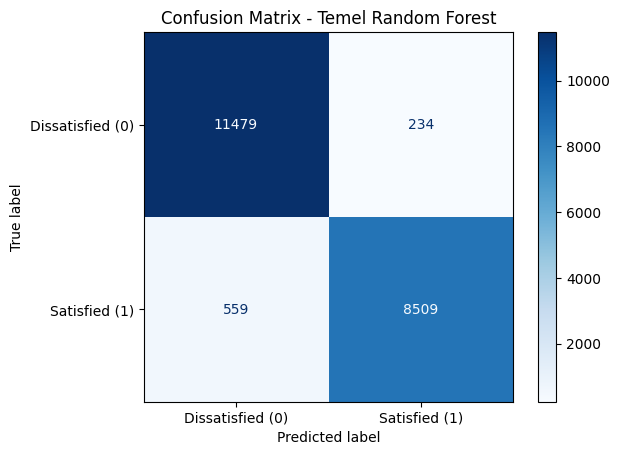

In [29]:
# Confusion Matrix
cm_rf = confusion_matrix(y_val, y_pred)
cmd_rf = ConfusionMatrixDisplay(cm_rf, display_labels=["Dissatisfied (0)", "Satisfied (1)"])
cmd_rf.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Temel Random Forest")
plt.show()

## HİPERPARAMETRE OPTİMİZASYONU (RandomizedSearchCV)

In [30]:
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)
print("En iyi parametreler:", random_search.best_params_)

best_model = random_search.best_estimator_

En iyi parametreler: {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 30}


In [46]:
# Doğrulama seti üzerinde tahmin
y_pred_best = best_model.predict(X_val)

acc_best = accuracy_score(y_val, y_pred_best)
print("\nİyileştirilmiş Model Doğruluğu (Accuracy):", acc_best)
print("Sınıflandırma Raporu (İyileştirilmiş Model):")
print(classification_report(y_val, y_pred_best))


İyileştirilmiş Model Doğruluğu (Accuracy): 0.9615514171599057
Sınıflandırma Raporu (İyileştirilmiş Model):
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11713
           1       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



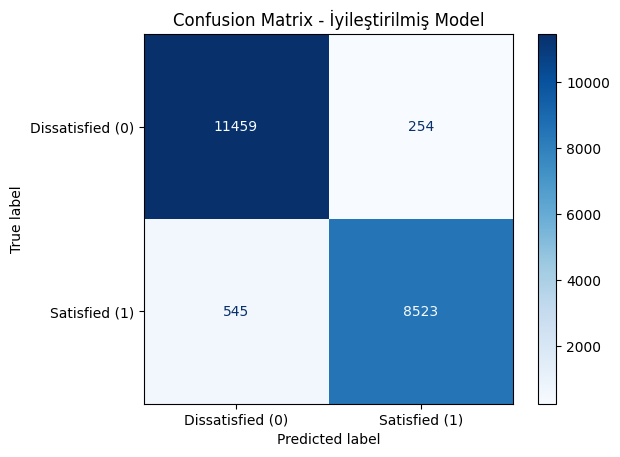

In [47]:
# Confusion Matrix
cm_best = confusion_matrix(y_val, y_pred_best)
cmd_best = ConfusionMatrixDisplay(cm_best, display_labels=["Dissatisfied (0)", "Satisfied (1)"])
cmd_best.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - İyileştirilmiş Model")
plt.show()

In [48]:
# Cross-Validation skoru (ortalama)
print("Cross-Validation Ortalama Doğruluk:", random_search.best_score_)

Cross-Validation Ortalama Doğruluk: 0.9590726912319841


## ÖZELLİK ÖNEM DÜZEYLERİ ve ÖĞRENME EĞRİSİ

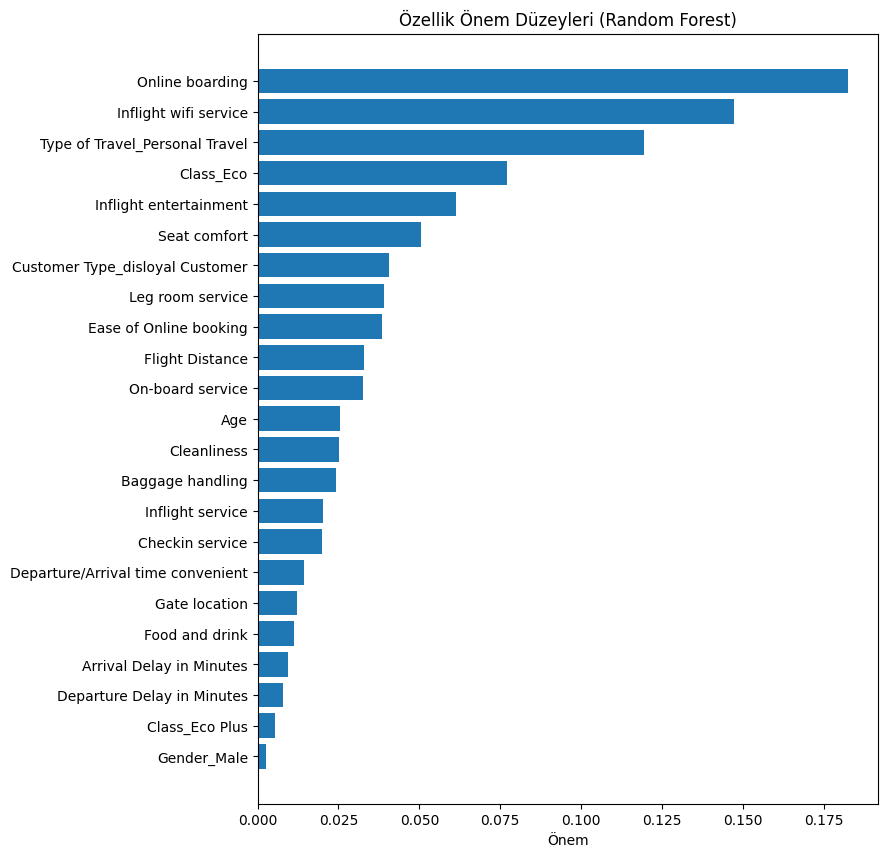

In [49]:
# Özellik Önem Düzeyleri
importances = best_model.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)

plt.figure(figsize=(8, 10))
plt.title("Özellik Önem Düzeyleri (Random Forest)")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Önem")
plt.show()

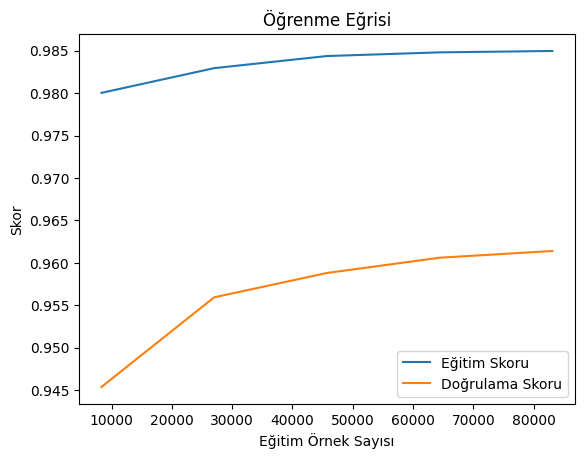

In [50]:
# Öğrenme Eğrisi (Learning Curve)
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X, y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label="Eğitim Skoru")
plt.plot(train_sizes, val_scores_mean, label="Doğrulama Skoru")
plt.xlabel("Eğitim Örnek Sayısı")
plt.ylabel("Skor")
plt.title("Öğrenme Eğrisi")
plt.legend()
plt.show()

## TEST SETİ ÖN İŞLEME ve TAHMİN ÜRETME

In [52]:
# Test setinde kategorik sütunları bulalım
cat_cols_test = test.select_dtypes(include=['object']).columns

# One-Hot Encoding (drop_first=True)
test_encoded = pd.get_dummies(test, columns=cat_cols_test, drop_first=True)

# Eğitim setindeki sütunlara göre reindex
test_encoded = test_encoded.reindex(columns=X_train.columns, fill_value=0)

# Tahmin üret
test_predictions = best_model.predict(test_encoded)

# Sonuçları test setine ekle ve CSV kaydet
test["prediction"] = test_predictions
test.to_csv("test_predictions.csv", index=False)
print("'test_predictions.csv' dosyası oluşturuldu")

'test_predictions.csv' dosyası oluşturuldu


In [ ]:
from google.colab import drive
drive.mount('/content/drive')